# CS 419: Assignment 1

Michaela Buchanan


---



In [0]:
#!pip install tensorflow-gpu
#!pip install keras



---


# Textbook Code (pg 27-30)

Importing the MNIST dataset and creating the training and test datasets

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


Taking a look at our downloaded dataset characteristics

In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


We now know that the training dataset has 60,000 samples and the testing dataset has 10,000 samples. Time to start creating the neural network!

In [4]:
from tensorflow.keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


*Note: had to change*

```
from keras import ...
```

*to*

```
from tensorflow.keras import ...
```
*to get it to import correctly*


This creates a basic neural network with one hidden RELU layer. Both of the layers created above are **dense** layers which means that they are fully connected in a data flow context. The last softmax layer does the actual classifying by returning 10 probabilities for each of the different classes.



In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Now we need to set up a few more things before we start training. The optimizer (in this case rmsprop) updates the network based on the loss function and the data fed in. The loss function measures the performance of the network so far on the given training data. The metric tells the network what performance metric we care about (in this case classification accuracy).

Finally, we need to preprocess our input data so it takes the form that our network expects.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Then we create labels for our data.

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train! In Keras, you start training by using the `fit` method.

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2587 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1033 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0678 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0497 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0372 - acc: 0.9886


Next, we test our newly trained network on our test dataset to test for overfitting.

---



In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.0713 - acc: 0.9785
test_acc: 0.9785


The accuracy for the test set is a bit lower than the training accuracy, indicating that some overfitting is taking place.



---
# Step 2


Creating our training and testing datasets for testing our functions. These consist of 10,000 size 5 tuples and 1,000 size 5 tuples of random floats between 0 and 1 respectively.

In [0]:
import numpy as np
my_x_train = np.random.random_sample((10000,5))
my_x_test = np.random.random_sample((1000,5))

Below I will set up the model which will be used for testing my three functions. I chose to pursue a regression approach to this problem. Since using accuracy as a metric for a regression problem doesn't make much sense, I switched to a mean absolute error metric to evaluate the model's performance. 



---


**Function #1**

For the example, I used the following function:
f(x)=x1 + (x2 * 2) + (x3 * 3) + (x4 * 4) + (x5 * 5)

I got a MAE of ~0.418 on the testing dataset with my first initialization of the random dataset.

In [11]:
from tensorflow.keras import models, layers

# create labels for each function
f1_train_labels = np.zeros(shape=(10000,1))
f1_test_labels = np.zeros(shape=(1000,1))

for x in range (0,9999):
  f1_train_labels[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

for y in range (0,999):
  f1_test_labels[y] = float(my_x_test[y][0] + my_x_test[y][1]*2 + my_x_test[y][2]*3 + my_x_test[y][3]*4 + my_x_test[y][4]*5)


# create model
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(5,)))
network.add(layers.Dense(1, activation='linear'))

# network compile
network.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
history = network.fit(my_x_train, f1_train_labels, epochs=5, batch_size=128)

# evaluate results
loss, mae = network.evaluate(my_x_test, f1_test_labels)
print("Testing Set MAE: " + str(mae))


Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 0s 39us/sample - loss: 2.8502 - mean_absolute_error: 0.9069
Epoch 2/5
10000/10000 [==============================] - 0s 31us/sample - loss: 0.2016 - mean_absolute_error: 0.4205
Epoch 3/5
10000/10000 [==============================] - 0s 33us/sample - loss: 0.1751 - mean_absolute_error: 0.3968
Epoch 4/5
10000/10000 [==============================] - 0s 33us/sample - loss: 0.1593 - mean_absolute_error: 0.3811
Epoch 5/5
1000/1000 [==============================] - 0s 89us/sample - loss: 0.1431 - mean_absolute_error: 0.2166
Testing Set MAE: 0.21663305




---


**Function #2**

For this function I chose to try f(x) = x1 + (x2)^2 + (x3)^3 + (x4)^4 + (x5)^5

I got a MAE of ~0.094 on the testing dataset with my first initialization of the random dataset.

In [12]:
from tensorflow.keras import models, layers

# create labels for each function
f2_train_labels = np.zeros(shape=(10000,1))
f2_test_labels = np.zeros(shape=(1000,1))

for x in range (0,9999):
  f2_train_labels[x] = float(my_x_train[x][0] + my_x_train[x][1]**2 + my_x_train[x][2]**3 + my_x_train[x][3]**4 + my_x_train[x][4]**5)

for y in range (0,999):
  f2_test_labels[y] = float(my_x_test[y][0] + my_x_test[y][1]**2 + my_x_test[y][2]**3 + my_x_test[y][3]**4 + my_x_test[y][4]**5)


# create model
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(5,)))
network.add(layers.Dense(1, activation='linear'))

# network compile
network.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network.fit(my_x_train, f2_train_labels, epochs=5, batch_size=128)

# evaluate results
loss, mae = network.evaluate(my_x_test, f2_test_labels)
print("Testing Set MAE: " + str(mae))

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 0s 38us/sample - loss: 0.1437 - mean_absolute_error: 0.2794
Epoch 2/5
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0675 - mean_absolute_error: 0.2039
Epoch 3/5
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0532 - mean_absolute_error: 0.1789
Epoch 4/5
10000/10000 [==============================] - 0s 29us/sample - loss: 0.0437 - mean_absolute_error: 0.1650
Epoch 5/5
1000/1000 [==============================] - 0s 98us/sample - loss: 0.0146 - mean_absolute_error: 0.0885
Testing Set MAE: 0.08845506




---


**Function #3**

For my final function I chose: f(x) = sin(x1) + cos(x2) + sin(x3) + cos(x4) + sin(x5)

I got a MAE of ~0.023 on the training dataset with my first initialization of the random dataset.

In [13]:
from tensorflow.keras import models, layers
import math

# create labels for each function

## uncomment for function 1 ##
f1_train_labels = np.zeros(shape=(10000,1))
f1_test_labels = np.zeros(shape=(1000,1))

for x in range (0,9999):
  f1_train_labels[x] = float(math.sin(my_x_train[x][0]) * math.cos(my_x_train[x][1]) * math.sin(my_x_train[x][2]) * math.cos(my_x_train[x][3]) * math.sin(my_x_train[x][4]))

for y in range (0,999):
  f1_test_labels[y] = float(math.sin(my_x_test[y][0]) * math.cos(my_x_test[y][1]) * math.sin(my_x_test[y][2]) * math.cos(my_x_test[y][3]) * math.sin(my_x_test[y][4]))


# create model
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(5,)))
network.add(layers.Dense(1, activation='linear'))

# network compile
network.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network.fit(my_x_train, f1_train_labels, epochs=5, batch_size=128)

# evaluate results
loss, mae = network.evaluate(my_x_test, f1_test_labels)
print("Testing Set MAE: " + str(mae))

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 0s 39us/sample - loss: 0.0158 - mean_absolute_error: 0.0765
Epoch 2/5
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0020 - mean_absolute_error: 0.0336
Epoch 3/5
10000/10000 [==============================] - 0s 31us/sample - loss: 9.6119e-04 - mean_absolute_error: 0.0230
Epoch 4/5
10000/10000 [==============================] - 0s 29us/sample - loss: 6.6436e-04 - mean_absolute_error: 0.0198
Epoch 5/5
1000/1000 [==============================] - 0s 97us/sample - loss: 1.3539e-04 - mean_absolute_error: 0.0079
Testing Set MAE: 0.007946837


# Step 3

We now want to test what effect the amount of training data used has on the accuracy of the model. To do this, I will train models for each of the three functions defined above with varying amounts of training data (1000, 100, and 10) to see how each is affected by the decrease in training samples.



---
**Function #1**


Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 492us/sample - loss: 48.4431 - mean_absolute_error: 6.6717
Epoch 2/5
1000/1000 [==============================] - 0s 38us/sample - loss: 28.0460 - mean_absolute_error: 5.0085
Epoch 3/5
1000/1000 [==============================] - 0s 29us/sample - loss: 13.9195 - mean_absolute_error: 3.4249
Epoch 4/5
1000/1000 [==============================] - 0s 30us/sample - loss: 5.5696 - mean_absolute_error: 2.0391
Epoch 5/5
1000/1000 [==============================] - 0s 431us/sample - loss: 1.4005 - mean_absolute_error: 0.9395
Testing Set MAE: 0.9395333
Testing Set Loss: 1.4004687004089356
Train on 100 samples
Epoch 1/5
100/100 [==============================] - 0s 4ms/sample - loss: 63.6291 - mean_absolute_error: 7.6990
Epoch 2/5
100/100 [==============================] - 0s 42us/sample - loss: 61.9774 - mean_absolute_error: 7.5953
Epoch 3/5
100/100 [==============================] - 0s 50us/sample - loss: 60.8040 - 

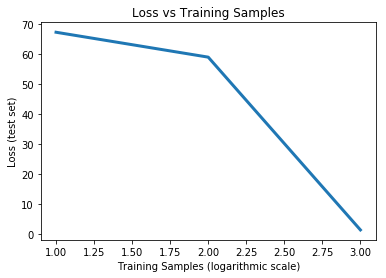

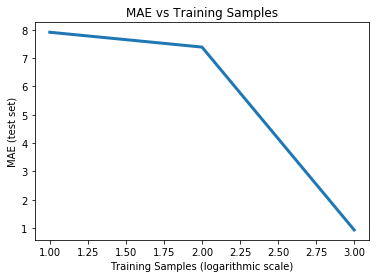

In [38]:
from tensorflow.keras import models, layers
import math
import matplotlib.pyplot as plt

# --- 1000 training samples --- #

my_x_train = np.random.random_sample((1000,5))
my_x_test = np.random.random_sample((1000,5))

f1_train_labels_1000 = np.zeros(shape=(1000,1))
f1_test_labels = np.zeros(shape=(1000,1))

for x in range (0,999):
  f1_train_labels_1000[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

for y in range (0,999):
  f1_test_labels[y] = float(my_x_test[y][0] + my_x_test[y][1]*2 + my_x_test[y][2]*3 + my_x_test[y][3]*4 + my_x_test[y][4]*5)

# create model
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(5,)))
network.add(layers.Dense(1, activation='linear'))

# network compile
network.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])

# fit model (training)
network.fit(my_x_train, f1_train_labels_1000, epochs=5, batch_size=128)

# evaluate results
loss, mae = network.evaluate(my_x_test, f1_test_labels)
print("Testing Set MAE: " + str(mae))
print("Testing Set Loss: " + str(loss))

# --- 100 training samples --- #

my_x_train = my_x_train[0:100]

f1_train_labels_100 = np.zeros(shape=(100,1))

for x in range (0,99):
  f1_train_labels_100[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

# create model
network2 = models.Sequential()
network2.add(layers.Dense(100, activation='relu', input_shape=(5,)))
network2.add(layers.Dense(1, activation='linear'))

# network compile
network2.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network2.fit(my_x_train, f1_train_labels_100, epochs=5, batch_size=128)

# evaluate results
loss2, mae2 = network2.evaluate(my_x_test, f1_test_labels)
print("Testing Set MAE: " + str(mae2))
print("Testing Set Loss: " + str(loss2))

# --- 10 training samples --- #

my_x_train = my_x_train[0:10]

f2_train_labels_10 = np.zeros(shape=(10,1))

for x in range (0,9):
  f1_train_labels_10[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

# create model
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='relu', input_shape=(5,)))
network3.add(layers.Dense(1, activation='linear'))

# network compile
network3.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
history3 = network3.fit(my_x_train, f1_train_labels_10, epochs=5, batch_size=128)

# evaluate results
loss3, mae3 = network3.evaluate(my_x_test, f1_test_labels)
print("Testing Set MAE: " + str(mae3))
print("Testing Set Loss: " + str(loss3))

# --- Plot results --- #
x_values = [3, 2, 1]
y_values = [loss, loss2, loss3]
plt.plot(x_values, y_values, linewidth=3)
plt.title('Loss vs Training Samples')
plt.ylabel('Loss (test set)')
plt.xlabel('Training Samples (logarithmic scale)')
plt.show()

y_values = [mae, mae2, mae3]
plt.plot(x_values, y_values, linewidth=3)
plt.title('MAE vs Training Samples')
plt.ylabel('MAE (test set)')
plt.xlabel('Training Samples (logarithmic scale)')
plt.show()



---
**Function #2**


Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 393us/sample - loss: 50.2620 - mean_absolute_error: 6.7531
Epoch 2/5
1000/1000 [==============================] - 0s 32us/sample - loss: 29.5852 - mean_absolute_error: 5.1037
Epoch 3/5
1000/1000 [==============================] - 0s 31us/sample - loss: 14.6744 - mean_absolute_error: 3.4860
Epoch 4/5
1000/1000 [==============================] - 0s 28us/sample - loss: 5.8790 - mean_absolute_error: 2.0846
Epoch 5/5
1000/1000 [==============================] - 0s 394us/sample - loss: 1.2444 - mean_absolute_error: 0.8986
Testing Set MAE: 0.8986305
Testing Set Loss: 1.2443774223327637
Train on 100 samples
Epoch 1/5
100/100 [==============================] - 0s 4ms/sample - loss: 56.9697 - mean_absolute_error: 7.1873
Epoch 2/5
100/100 [==============================] - 0s 42us/sample - loss: 55.5752 - mean_absolute_error: 7.0961
Epoch 3/5
100/100 [==============================] - 0s 37us/sample - loss: 54.5623 - 

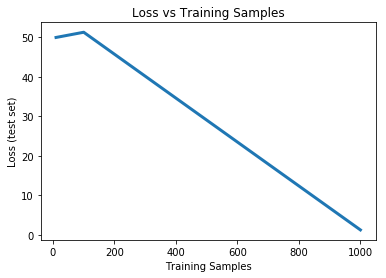

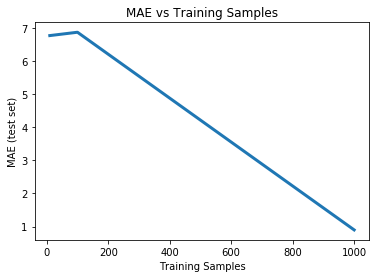

In [36]:
from tensorflow.keras import models, layers
import math

# --- 1000 training samples --- #

my_x_train = np.random.random_sample((1000,5))
my_x_test = np.random.random_sample((1000,5))

f2_train_labels_1000 = np.zeros(shape=(1000,1))
f2_test_labels = np.zeros(shape=(1000,1))

for x in range (0,999):
  f2_train_labels_1000[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

for y in range (0,999):
  f2_test_labels[y] = float(my_x_test[y][0] + my_x_test[y][1]*2 + my_x_test[y][2]*3 + my_x_test[y][3]*4 + my_x_test[y][4]*5)

# create model
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(5,)))
network.add(layers.Dense(1, activation='linear'))

# network compile
network.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])

# fit model (training)
network.fit(my_x_train, f2_train_labels_1000, epochs=5, batch_size=128)

# evaluate results
loss, mae = network.evaluate(my_x_test, f2_test_labels)
print("Testing Set MAE: " + str(mae))
print("Testing Set Loss: " + str(loss))

# --- 100 training samples --- #

my_x_train = my_x_train[0:100]

f2_train_labels_100 = np.zeros(shape=(100,1))

for x in range (0,99):
  f2_train_labels_100[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

# create model
network2 = models.Sequential()
network2.add(layers.Dense(100, activation='relu', input_shape=(5,)))
network2.add(layers.Dense(1, activation='linear'))

# network compile
network2.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network2.fit(my_x_train, f2_train_labels_100, epochs=5, batch_size=128)

# evaluate results
loss2, mae2 = network2.evaluate(my_x_test, f2_test_labels)
print("Testing Set MAE: " + str(mae2))
print("Testing Set Loss: " + str(loss2))

# --- 10 training samples --- #

my_x_train = my_x_train[0:10]

f2_train_labels_10 = np.zeros(shape=(10,1))

for x in range (0,9):
  f2_train_labels_10[x] = float(my_x_train[x][0] + my_x_train[x][1]*2 + my_x_train[x][2]*3 + my_x_train[x][3]*4 + my_x_train[x][4]*5)

# create model
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='relu', input_shape=(5,)))
network3.add(layers.Dense(1, activation='linear'))

# network compile
network3.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network3.fit(my_x_train, f2_train_labels_10, epochs=5, batch_size=128)

# evaluate results
loss3, mae3 = network3.evaluate(my_x_test, f2_test_labels)
print("Testing Set MAE: " + str(mae3))
print("Testing Set Loss: " + str(loss3))

# --- Plot results --- #
x_values = [3, 2, 1]
y_values = [loss, loss2, loss3]
plt.plot(x_values, y_values, linewidth=3)
plt.title('Loss vs Training Samples')
plt.ylabel('Loss (test set)')
plt.xlabel('Training Samples (logarithmic scale)')
plt.show()

y_values = [mae, mae2, mae3]
plt.plot(x_values, y_values, linewidth=3)
plt.title('MAE vs Training Samples')
plt.ylabel('MAE (test set)')
plt.xlabel('Training Samples (logarithmic scale)')
plt.show()



---

**Function #3**

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 459us/sample - loss: 0.0092 - mean_absolute_error: 0.0676
Epoch 2/5
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0022 - mean_absolute_error: 0.0365
Epoch 3/5
1000/1000 [==============================] - 0s 35us/sample - loss: 0.0027 - mean_absolute_error: 0.0445
Epoch 4/5
1000/1000 [==============================] - 0s 33us/sample - loss: 0.0022 - mean_absolute_error: 0.0406
Epoch 5/5
1000/1000 [==============================] - 0s 468us/sample - loss: 0.0047 - mean_absolute_error: 0.0646
Testing Set MAE: 0.06459708
Testing Set Loss: 0.00465715079754591
Train on 100 samples
Epoch 1/5
100/100 [==============================] - 0s 4ms/sample - loss: 0.0294 - mean_absolute_error: 0.1408
Epoch 2/5
100/100 [==============================] - 0s 55us/sample - loss: 0.0158 - mean_absolute_error: 0.1020
Epoch 3/5
100/100 [==============================] - 0s 46us/sample - loss: 0.0135 - mean

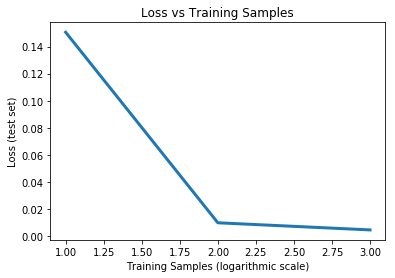

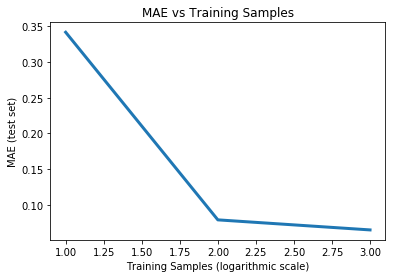

In [39]:
from tensorflow.keras import models, layers
import math

# --- 1000 training samples --- #

my_x_train = np.random.random_sample((1000,5))
my_x_test = np.random.random_sample((1000,5))

f3_train_labels = np.zeros(shape=(1000,1))
f3_test_labels = np.zeros(shape=(1000,1))

for x in range (0,999):
  f3_train_labels[x] = float(math.sin(my_x_train[x][0]) * math.cos(my_x_train[x][1]) * math.sin(my_x_train[x][2]) * math.cos(my_x_train[x][3]) * math.sin(my_x_train[x][4]))

for y in range (0,999):
  f3_test_labels[y] = float(math.sin(my_x_test[y][0]) * math.cos(my_x_test[y][1]) * math.sin(my_x_test[y][2]) * math.cos(my_x_test[y][3]) * math.sin(my_x_test[y][4]))

# create model
network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(5,)))
network.add(layers.Dense(1, activation='linear'))

# network compile
network.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])

# fit model (training)
network.fit(my_x_train, f3_train_labels, epochs=5, batch_size=128)

# evaluate results
loss, mae = network.evaluate(my_x_test, f3_test_labels)
print("Testing Set MAE: " + str(mae))
print("Testing Set Loss: " + str(loss))

# --- 100 training samples --- #

my_x_train = my_x_train[0:100]

f3_train_labels_100 = np.zeros(shape=(100,1))

for x in range (0,99):
  f3_train_labels_100[x] = float(math.sin(my_x_train[x][0]) * math.cos(my_x_train[x][1]) * math.sin(my_x_train[x][2]) * math.cos(my_x_train[x][3]) * math.sin(my_x_train[x][4]))

# create model
network2 = models.Sequential()
network2.add(layers.Dense(100, activation='relu', input_shape=(5,)))
network2.add(layers.Dense(1, activation='linear'))

# network compile
network2.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network2.fit(my_x_train, f3_train_labels_100, epochs=5, batch_size=128)

# evaluate results
loss2, mae2 = network2.evaluate(my_x_test, f3_test_labels)
print("Testing Set MAE: " + str(mae2))
print("Testing Set Loss: " + str(loss2))

# --- 10 training samples --- #

my_x_train = my_x_train[0:10]

f3_train_labels_10 = np.zeros(shape=(10,1))

for x in range (0,9):
  f3_train_labels_10[x] = float(math.sin(my_x_train[x][0]) * math.cos(my_x_train[x][1]) * math.sin(my_x_train[x][2]) * math.cos(my_x_train[x][3]) * math.sin(my_x_train[x][4]))

# create model
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='relu', input_shape=(5,)))
network3.add(layers.Dense(1, activation='linear'))

# network compile
network3.compile(optimizer='rmsprop', 
  loss='mean_squared_error',
  metrics=['mae'])


# fit model (training)
network3.fit(my_x_train, f3_train_labels_10, epochs=5, batch_size=128)

# evaluate results
loss3, mae3 = network3.evaluate(my_x_test, f3_test_labels)
print("Testing Set MAE: " + str(mae3))
print("Testing Set Loss: " + str(loss3))

# --- Plot results --- #
x_values = [3, 2, 1]
y_values = [loss, loss2, loss3]
plt.plot(x_values, y_values, linewidth=3)
plt.title('Loss vs Training Samples')
plt.ylabel('Loss (test set)')
plt.xlabel('Training Samples (logarithmic scale)')
plt.show()

y_values = [mae, mae2, mae3]
plt.plot(x_values, y_values, linewidth=3)
plt.title('MAE vs Training Samples')
plt.ylabel('MAE (test set)')
plt.xlabel('Training Samples (logarithmic scale)')
plt.show()